# Metadata:
<ul>

<li>"timestamp" - timestamp field for grouping the data </li>
<li>"cnt" - the count of a new bike shares </li>
<li>"t1" - real temperature in C</li>
<li> "t2" - temperature in C "feels like" </li>
<li> "hum" - humidity in percentage </li>
<li> "windspeed" - wind speed in km/h </li>
<li>"weathercode" - category of the weather </li>
<li> "isholiday" - boolean field - 1 holiday / 0 non holiday </li>
<li>"isweekend" - boolean field - 1 if the day is weekend and 0 otherwise</li>
<li>"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter. </li>

<b>"weathe_code" category description:</b>
<li>1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity </li>
<li> 2 = scattered clouds / few clouds </li>
<li> 3 = Broken clouds </li>
<li> 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain </li>
<li>10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog</li>

</ul>

In [14]:
import numpy    as np
import pandas   as pd
import seaborn  as sns
import matplotlib.pyplot as plt


data = pd.read_csv(r'data\london_merged.csv')

np.random.seed(0)



# EDA 

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB
None


In [16]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [17]:
#Checking the avaerage number of bike in each season during the weekend
data.groupby(['season','is_weekend']).mean()

cnt         t1         t2        hum  wind_speed  \
season is_weekend                                                             
0.0    0.0         1155.294043  10.660879   9.401402  68.340873   16.451099   
       1.0          975.113944  10.681275   9.477291  69.242032   16.256375   
1.0    0.0         1495.814013  18.362739  18.317516  66.887261   15.847930   
       1.0         1385.527666  18.603448  18.565357  66.738974   15.622294   
2.0    0.0         1264.146571  13.301592  12.828242  75.826454   14.557686   
       1.0          965.139478  12.380778  11.705411  76.772023   13.760060   
3.0    0.0          918.106541   7.556509   5.604760  77.390868   16.552137   
       1.0          582.104670   8.011272   5.974235  79.205314   18.557166   

                   weather_code  is_holiday  
season is_weekend                            
0.0    0.0             2.527557    0.061166  
       1.0             2.771315    0.000000  
1.0    0.0             2.406688    0.015287  
       1.0             2.319166    0.000000  
2.0    0.0             2.728632    0.000000  
       1.0             2.815661    0.000000  
3.0    0.0             2.984132    0.046632  
       1.0             3.615137    0.000000

In [18]:
#Checking the avaerage number of bike in each season during the weekend
data.groupby(['season','is_holiday']).mean()

cnt         t1         t2        hum  wind_speed  \
season is_holiday                                                             
0.0    0.0         1113.428129  10.618991   9.358877  68.418670   16.327047   
       1.0          893.807292  11.710938  10.828125  72.528646   17.893229   
1.0    0.0         1470.567873  18.441692  18.398364  66.727702   15.854575   
       1.0          912.812500  17.479167  17.447917  77.458333    9.385417   
2.0    0.0         1178.954218  13.039236  12.508328  76.095863   14.330428   
3.0    0.0          830.868371   7.688963   5.708911  77.891304   17.197563   
       1.0          556.055556   7.628472   5.763889  78.493056   15.083333   

                   weather_code  is_weekend  
season is_holiday                            
0.0    0.0             2.557830    0.298667  
       1.0             3.458333    0.000000  
1.0    0.0             2.366444    0.287393  
       1.0             3.770833    0.000000  
2.0    0.0             2.753428    0.284917  
3.0    0.0             3.207597    0.296703  
       1.0             1.930556    0.000000

<AxesSubplot:xlabel='season', ylabel='cnt'>

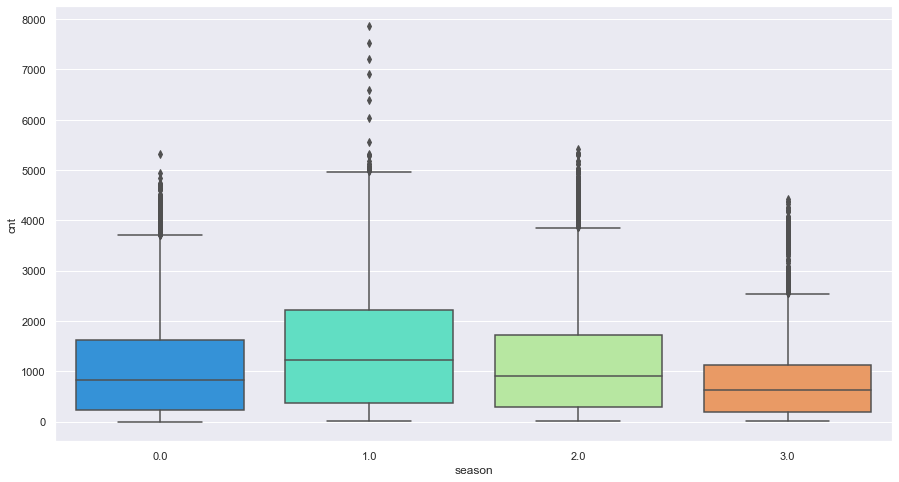

In [27]:
sns.set(font_scale=10)
sns.set(rc={"figure.figsize":(15, 8)}) #width=15, height=8

sns.boxplot(x='season', y='cnt', data=data,palette='rainbow')

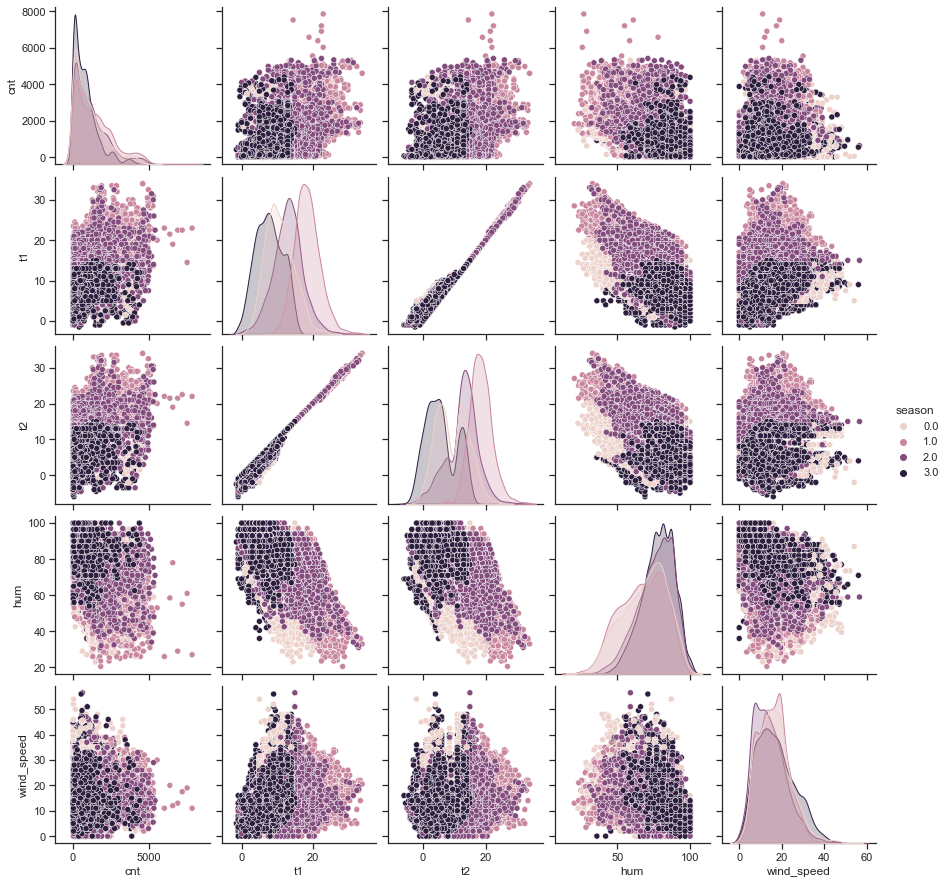

In [24]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set(rc={"figure.figsize":(20, 15)})
sns.set(style="ticks")
sns.pairplot(data[['cnt',	't1',	't2',	'hum',	'wind_speed',"season"]], hue="season")

#The plot show there is a strong positive correlation between t1 and t2 we shall have to droo one of them to avoid multicollinearity


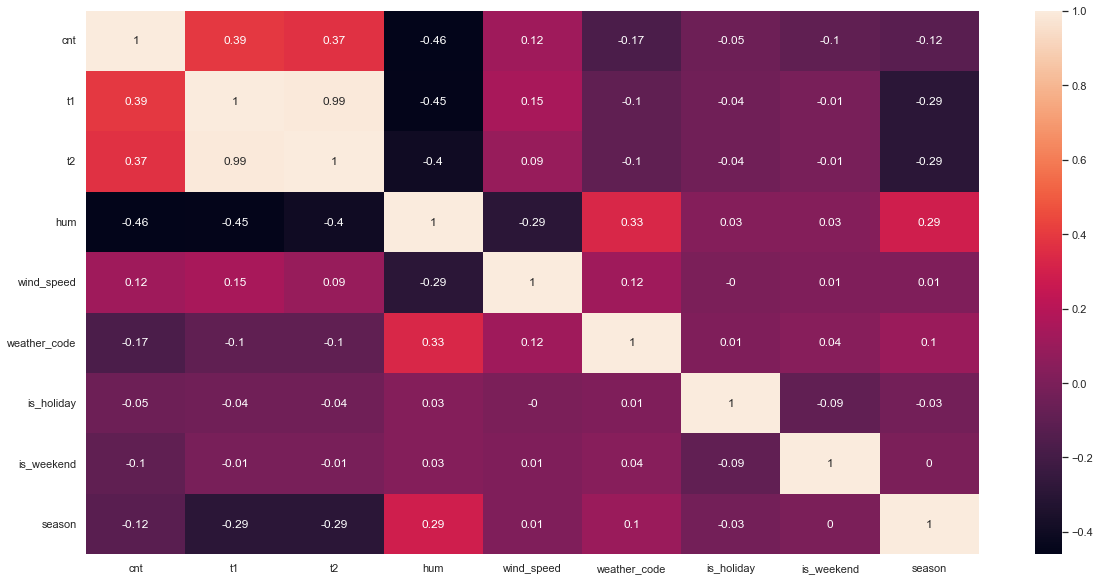

In [28]:
# https://www.statology.org/how-to-read-a-correlation-matrix/

data1 = pd.read_csv(r'data\london_merged.csv')
matrix = data1.corr().round(2)
sns.set(rc={"figure.figsize":(20,10)})
sns.heatmap(matrix, annot=True)
plt.show()

# Checking how many bikes were shared in each season during the weekend

<AxesSubplot:xlabel='season,is_weekend'>

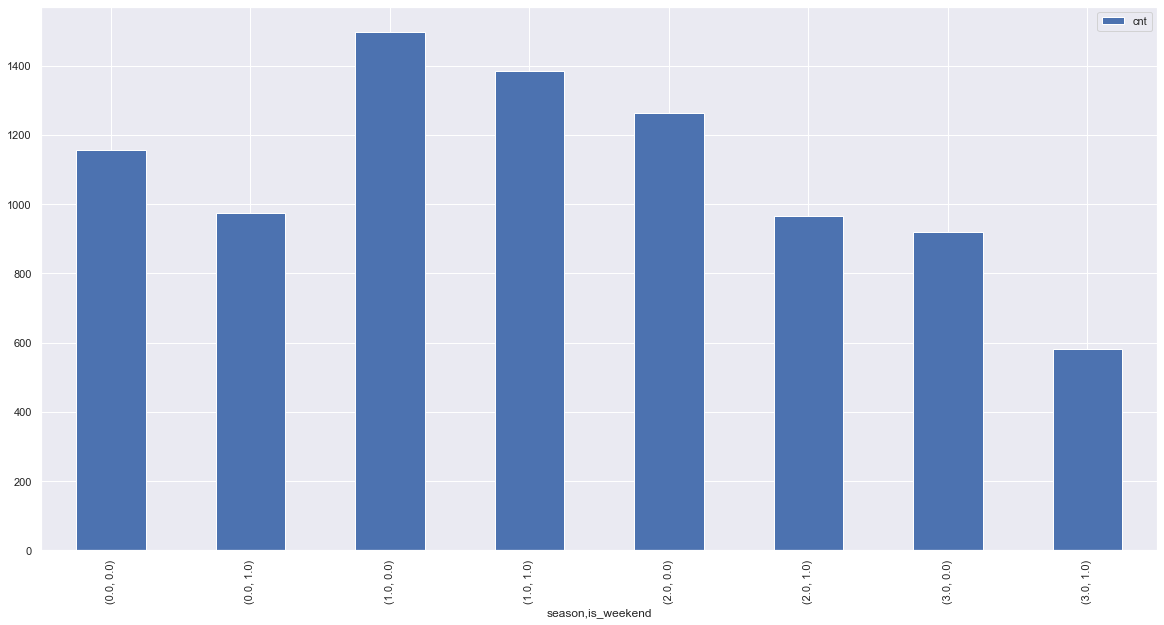

In [35]:
data[['cnt','season','is_weekend']].groupby(['season','is_weekend']).mean().plot(kind='bar')

#####  The bar chart above reviews that a lot of bikes were shared during weekends and week days of summer , the bar chart above reviews that more bikes were shared during weekdays of fall than in the weekends

# Checking how many bikes were shared in each season during the holidays

<AxesSubplot:xlabel='season,is_holiday'>

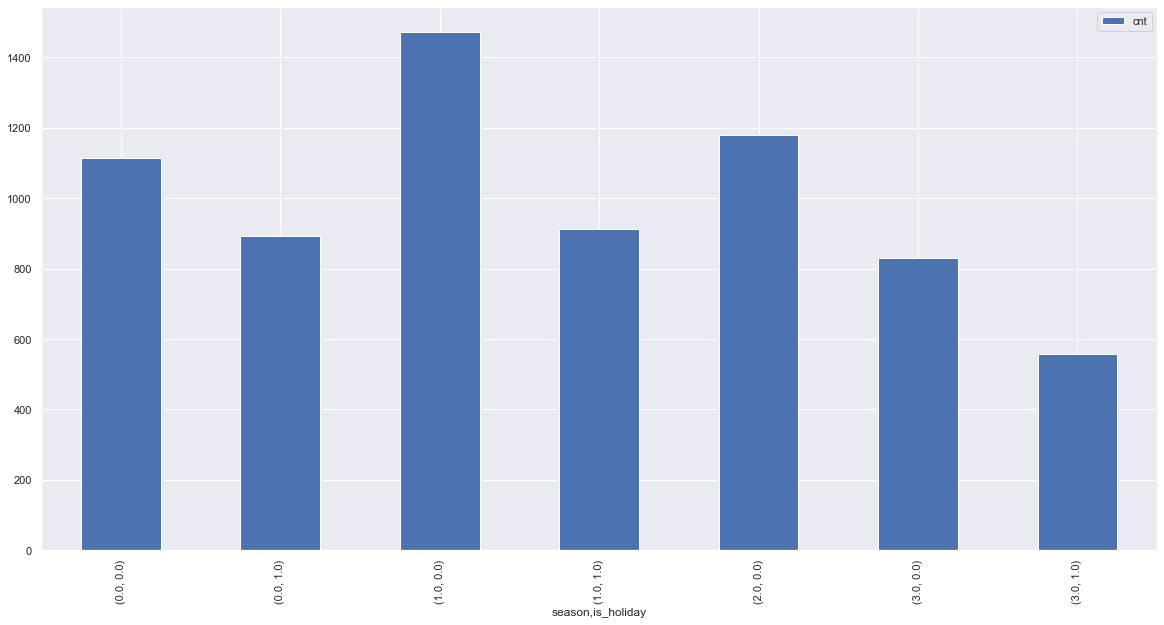

In [36]:
data[['cnt','season','is_holiday']].groupby(['season','is_holiday']).mean().plot(kind='bar')